<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


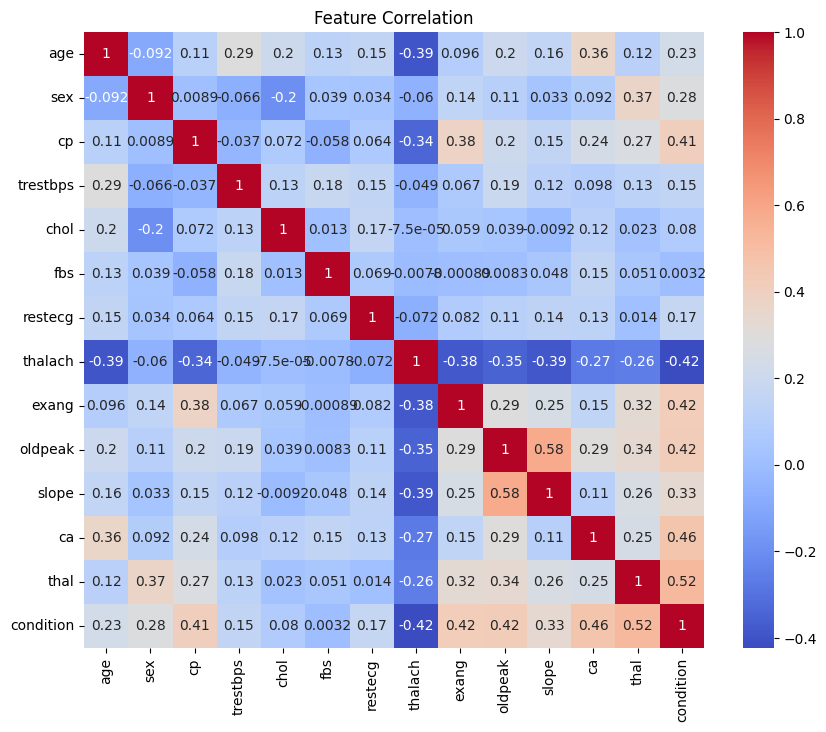

=== Decision Tree ===
Accuracy: 0.7833333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80        32
           1       0.78      0.75      0.76        28

    accuracy                           0.78        60
   macro avg       0.78      0.78      0.78        60
weighted avg       0.78      0.78      0.78        60



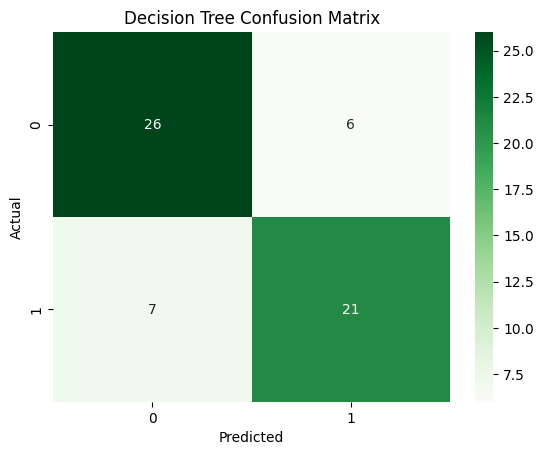

=== K-Nearest Neighbors ===
Accuracy: 0.9

Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91        32
           1       1.00      0.79      0.88        28

    accuracy                           0.90        60
   macro avg       0.92      0.89      0.90        60
weighted avg       0.92      0.90      0.90        60



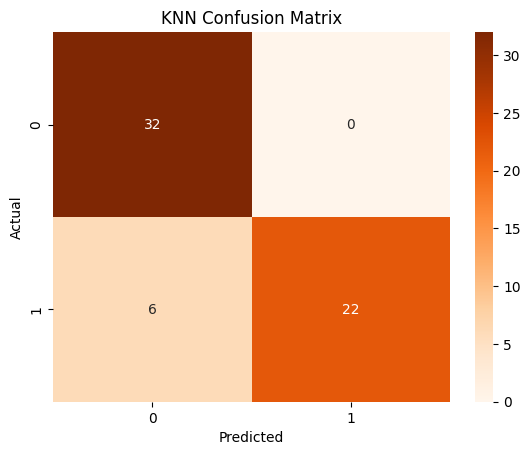

Decision Tree Accuracy: 0.7833333333333333
KNN Accuracy: 0.9
Both Decision Tree and KNN models perform well. Decision Trees are more interpretable, while KNN requires feature scaling. Further tuning (depth, k, etc.) could improve performance.


In [3]:
# Heart Disease Prediction with Decision Tree and K-Nearest Neighbors

## 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## 2. Load Dataset
df = pd.read_csv("heart_cleveland_upload.csv")
df.head()

## 3. Basic Exploration
df.info()
df.describe()
df["condition"].value_counts()  # 1 = heart disease, 0 = no heart disease

## 4. Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

## 5.Train/Test Split
X = df.drop("condition", axis=1)
y = df["condition"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## 6. Feature Scaling (for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 7. Train Decision Tree
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)

## 8. Train KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

## 9. Predictions
y_pred_tree = tree_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test_scaled)

## 10. Evaluation – Decision Tree
print("=== Decision Tree ===")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, cmap="Greens", fmt="d")
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## 11. Evaluation – KNN
print("=== K-Nearest Neighbors ===")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, cmap="Oranges", fmt="d")
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## 12. Compare Models
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

## 13. Conclusion
print("Both Decision Tree and KNN models perform well. Decision Trees are more interpretable, while KNN requires feature scaling. Further tuning (depth, k, etc.) could improve performance.")
